## CAMS irradiance data

Both clear sky and all weather irradiance from 
https://ads.atmosphere.copernicus.eu/datasets/cams-solar-radiation-timeseries?tab=download




```
# Columns:
# 1. Observation period (ISO 8601)
# 2. TOA. Irradiation on horizontal plane at the top of atmosphere (Wh/m2)
# 3. Clear sky GHI. Clear sky global irradiation on horizontal plane at ground level (Wh/m2)
# 4. Clear sky BHI. Clear sky beam irradiation on horizontal plane at ground level (Wh/m2)
# 5. Clear sky DHI. Clear sky diffuse irradiation on horizontal plane at ground level (Wh/m2)
# 6. Clear sky BNI. Clear sky beam irradiation on mobile plane following the sun at normal incidence (Wh/m2)
# 7. GHI. Global irradiation on horizontal plane at ground level (Wh/m2)
# 8. BHI. Beam irradiation on horizontal plane at ground level (Wh/m2)
# 9. DHI. Diffuse irradiation on horizontal plane at ground level (Wh/m2)
#10. BNI. Beam irradiation on mobile plane following the sun at normal incidence (Wh/m2)
#11. Reliability. Proportion of reliable data in the summarization (0-1)
```

In [1]:
import pandas as pd
from pvodataset import PVODataset, UDFClass, QCfunc
import matplotlib.pyplot as plt 
import pytz

In [2]:
# Read the CSV file with semicolon delimiter
# The fullcams_station data is read from the CAMS databse

df_cams = pd.read_csv('../datasets/fullcams_station07_v4.csv',  comment='#', sep=';')
# Convert 'Observation period' to datetime
df_cams['Observation period'] = pd.to_datetime(df_cams['Observation period'].str.split('/').str[0])
df_cams['Observation period'] = df_cams['Observation period'].dt.tz_localize('UTC').dt.tz_convert('Asia/Shanghai')


In [3]:
df_cams.set_index('Observation period', inplace=True)
df_cams.head(2)


,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,Reliability
Observation period,,,,,,,,,,
2018-06-30 08:00:00+08:00,178.5525,99.1361,35.9104,63.2257,66.1874,40.8164,0.3417,40.4747,0.6297,1.0
2018-06-30 08:15:00+08:00,192.7724,110.8841,42.5477,68.3364,72.6474,44.3293,0.4473,43.8820,0.7574,1.0


In [4]:
df_cams.describe()

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,Reliability
count,33504.000000,33504.000000,33504.000000,33504.000000,33504.000000,33504.000000,33504.000000,33504.000000,33504.000000,33504.000000
mean,83.847959,54.756868,32.478098,22.278770,53.382473,42.195191,21.150846,21.044345,35.692712,0.977252
std,105.115044,74.260235,50.144688,29.373547,70.942939,63.947462,42.478987,30.049631,63.114785,0.090714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.999050,0.194850,0.001100,0.191450,0.000000,0.131450,0.000000,0.130500,0.000000,1.000000
75%,172.930750,108.746800,56.136675,41.275750,108.116650,69.780925,18.362225,35.900375,45.283000,1.000000
max,320.943300,264.016600,229.160800,131.807500,262.431400,264.016600,229.160800,143.308200,262.431400,1.000000


It is PUZZLING that the irradiance measures seem low. The theoretical maximum should be closer to 1000.

The PVOD data for each station combines local measured data (LMD) and data from NWP (supposedly the CAMS dataset)

In [5]:
pvod = PVODataset(path="../datasets/",timezone="UTC+8")
meta_data = pvod.read_metadata()
ori_data_0 = pvod.read_ori_data(station_id=7)


Welcome to PVODataset (PVOD).


In [6]:
ori_data_0.head(2)

,date_time,nwp_globalirrad,nwp_directirrad,nwp_temperature,nwp_humidity,nwp_windspeed,nwp_winddirection,nwp_pressure,lmd_totalirrad,lmd_diffuseirrad,lmd_temperature,lmd_pressure,lmd_winddirection,lmd_windspeed,power
0,2018-07-01 00:00:00+08:00,0.0,0.0,19.86,61.42,3.49,338.26,930.57,0,0,17.6,934.799988,168,0.0,0.0
1,2018-07-01 00:15:00+08:00,0.0,0.0,19.81,61.22,3.51,339.19,930.51,0,0,17.5,934.700012,172,0.0,0.0


In [7]:
ori_data_0.describe()

,nwp_globalirrad,nwp_directirrad,nwp_temperature,nwp_humidity,nwp_windspeed,nwp_winddirection,nwp_pressure,lmd_totalirrad,lmd_diffuseirrad,lmd_temperature,lmd_pressure,lmd_winddirection,lmd_windspeed,power
count,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000
mean,160.289396,140.283026,12.179077,45.922264,3.870690,201.738667,939.949109,195.965592,71.969479,11.835228,943.852539,182.922558,0.977815,2.618584
std,239.551968,220.299354,10.680399,22.790590,2.098138,120.487083,7.596273,314.079130,126.167484,10.892492,7.873876,100.113193,0.875178,4.106109
min,0.000000,0.000000,-11.640000,4.850000,0.100000,0.020000,922.340000,0.000000,0.000000,-13.800000,925.500000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.480000,27.470000,2.450000,84.450000,932.940000,0.000000,0.000000,3.100000,936.700012,136.000000,0.000000,0.000000
50%,0.000000,0.000000,12.330000,41.380000,3.550000,220.460000,940.850000,18.000000,0.000000,12.000000,944.200012,175.000000,1.000000,0.000000
75%,275.475000,231.990000,21.220000,62.750000,4.850000,323.730000,945.150000,277.000000,91.000000,20.900000,949.299988,247.000000,1.500000,4.206456
max,964.060000,910.090000,35.830000,100.000000,19.090000,359.990000,960.280000,1518.000000,656.000000,36.099998,966.799988,359.000000,10.100000,17.280581


### Data issues

The solar station data has 5 days of missing dates in March 2018 (perhaps a Chinese holiday). To merge our dataframes we'll have to make allowance for this.

In [8]:
# remove data before 2018-01-01 and after 2020-12-31
df_cams = df_cams.iloc[64:]
df_cams = df_cams.iloc[:-32]


In [9]:
print(df_cams.shape)
ori_data_0.shape

(33408, 10)


(32928, 15)

In [23]:
df_cams.index.dtype, ori_data_0.index.dtype

(datetime64[ns, Asia/Shanghai], datetime64[ns, Asia/Shanghai])

In [ ]:
# Check dataframes first
print("ori_data_0 shape:", ori_data_0.shape)
print("df_cams shape:", df_cams.shape)
print("\nori_data_0 index:", ori_data_0.index.dtype)
print("df_cams index:", df_cams.index.dtype)


# Merge dataframes
merged_df = pd.merge(
    df_cams,
    ori_data_0, 

    left_index=True,
    right_index=True,
    how='outer',
    indicator=True
)
print("hello")

# Verify results
print("\nMerged shape:", merged_df.shape)




ori_data_0 shape: (32928, 14)
df_cams shape: (33408, 10)

ori_data_0 index: datetime64[ns, Asia/Shanghai]
df_cams index: datetime64[ns, Asia/Shanghai]
hello

Merged shape: (33408, 25)

Missing values:


In [12]:
merged_df._merge.value_counts()

_merge
left_only     33408
right_only    32928
both              0
Name: count, dtype: int64

In [28]:
# Now drop the observations where the data is missing (March dates)
merged_df = merged_df[merged_df._merge != "left_only"]

In [29]:
merged_df.columns

Index(['TOA', 'Clear sky GHI', 'Clear sky BHI', 'Clear sky DHI',
       'Clear sky BNI', 'GHI', 'BHI', 'DHI', 'BNI', 'Reliability',
       'nwp_globalirrad', 'nwp_directirrad', 'nwp_temperature', 'nwp_humidity',
       'nwp_windspeed', 'nwp_winddirection', 'nwp_pressure', 'lmd_totalirrad',
       'lmd_diffuseirrad', 'lmd_temperature', 'lmd_pressure',
       'lmd_winddirection', 'lmd_windspeed', 'power', '_merge'],
      dtype='object')

## Puzzle of data not lining up


The irradiance data from the CAMS seems suspiciously low and imperfectly correlated with the PVOD data.  See tables and graphs below.

In [31]:
merged_df[['Clear sky GHI', 'Clear sky BHI', 'Clear sky DHI',  'Clear sky BNI', 'GHI', 'BHI', 'DHI', 'BNI', 'nwp_globalirrad', 'nwp_directirrad']].describe()

,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,nwp_globalirrad,nwp_directirrad
count,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000,32928.000000
mean,54.689072,32.402554,22.286517,53.231270,42.185954,21.139355,21.046599,35.628734,160.289396,140.283026
std,74.231914,50.071693,29.360683,70.738532,63.983721,42.468949,30.058748,62.992702,239.551968,220.299354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.187000,0.000900,0.183900,0.000000,0.128050,0.000000,0.127250,0.000000,0.000000,0.000000
75%,108.562575,55.979650,41.365850,108.062300,69.733450,18.306875,35.991900,45.180425,275.475000,231.990000
max,264.016600,229.160800,131.807500,262.431400,264.016600,229.160800,143.308200,262.431400,964.060000,910.090000


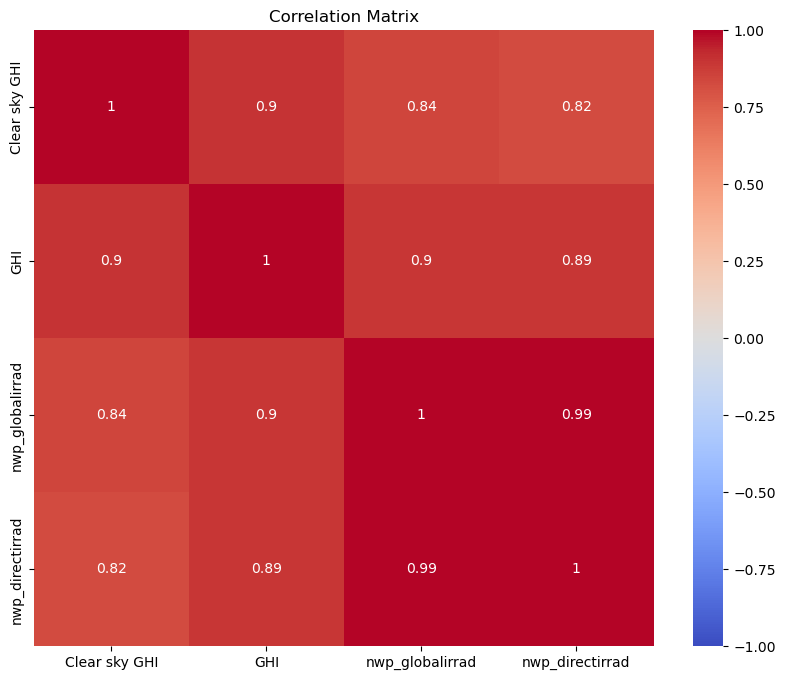

In [31]:
import seaborn as sns

import matplotlib.pyplot as plt

# Select relevant columns
selected_columns = ['Clear sky GHI', 'GHI', 'nwp_globalirrad', 'nwp_directirrad']
correlation_matrix = merged_df[selected_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

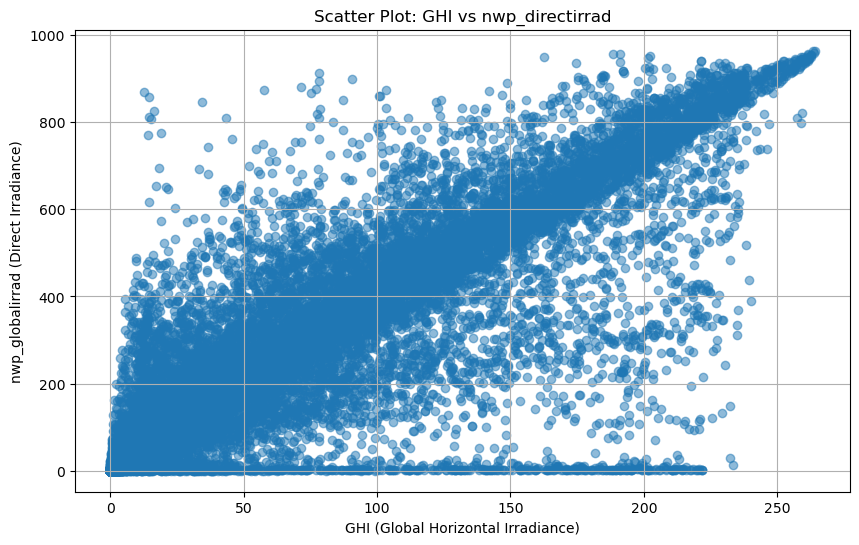

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['GHI'], merged_df['nwp_globalirrad'], alpha=0.5)
plt.title('Scatter Plot: GHI vs nwp_directirrad')
plt.xlabel('GHI (Global Horizontal Irradiance)')
plt.ylabel('nwp_globalirrad (Direct Irradiance)')
plt.grid(True)
plt.show()

## Not used


We download CSV data from here: https://ads.atmosphere.copernicus.eu/datasets/cams-solar-radiation-timeseries?tab=download

The API data ccess is not working. But I kept code here in case we can make it work in the future.  It uses the api key in .cdsapirc file in the c:\users\jonat\.cdsapirc file



```python
import cdsapi

dataset = "cams-solar-radiation-timeseries"
request = {
    "sky_type": "observed_cloud",
    "location": {"longitude": 114.95139, "latitude": 38.04778},
    "altitude": ["640"],
    "date": ["2023-11-15/2024-11-15"],
    "time_step": "15minute",
    "time_reference": "universal_time",
    "format": "csv"
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()
```
